## Importing libraries

In [80]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

## Kh·∫£o s√°t d·ªØ li·ªáu

In [72]:
df = pd.read_csv('raw_sales.csv')
#Tr·∫£ v·ªÅ (n) h√†ng ƒë·∫ßu ti√™n cho c√°c ƒë·ªëi t∆∞·ª£ng trong b·ªô d·ªØ li·ªáu. Quickly testing data
df.head()

datesold  postcode   price propertyType  bedrooms
0  2007-02-07 00:00:00      2607  525000        house         4
1  2007-02-27 00:00:00      2906  290000        house         3
2  2007-03-07 00:00:00      2905  328000        house         3
3  2007-03-09 00:00:00      2905  380000        house         4
4  2007-03-21 00:00:00      2906  310000        house         3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().any()

datesold        False
postcode        False
price           False
propertyType    False
bedrooms        False
dtype: bool

In [73]:
#Chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu c·ªßa datesold th√†nh ki·ªÉu datetime
df['datesold'] = pd.to_datetime(df['datesold'])
df.head()

datesold  postcode   price propertyType  bedrooms
0 2007-02-07      2607  525000        house         4
1 2007-02-27      2906  290000        house         3
2 2007-03-07      2905  328000        house         3
3 2007-03-09      2905  380000        house         4
4 2007-03-21      2906  310000        house         3

In [6]:
# T√≠nh kho·∫£ng th·ªùi gian ƒë·∫ßu - cu·ªëi c·ªßa b·ªô d·ªØ li·ªáu
print("Time period from {} to {}".format(df.datesold.min(), df.datesold.max()))

Time period from 2007-02-07 00:00:00 to 2019-07-27 00:00:00


## Descriptive analytics (Ph√¢n t√≠ch m√¥ t·∫£)

### Chu·∫©n b·ªã d·ªØ li·ªáu

In [74]:
# L·∫•y year t·ª´ datesold v√† chia d·ªØ li·ªáu th√†nh 3 v√πng ch√≠nh d·ª±a v√†o postcode: Region 1 (2599 - 2700), Region 2 (2701 - 2800), Region 3 (2801 - 2915)
df['year'] = df['datesold'].dt.year
for d in [df]:
  d.loc[(df['postcode'] > 2599) & (df['postcode'] <= 2700), 'region'] = 1;
  d.loc[(df['postcode'] > 2701) & (df['postcode'] <= 2800), 'region'] = 2;
  d.loc[(df['postcode'] > 2801) & (df['postcode'] <= 2915), 'region'] = 3;
df['region'] = df['region'].astype(int)
df.head()
# B·ªô d·ªØ li·ªáu kh√¥ng c√≥ d·ªØ li·ªáu b√°n b·∫•t ƒë·ªông s·∫£n ·ªü v√πng 2

datesold  postcode   price propertyType  bedrooms  year  region
0 2007-02-07      2607  525000        house         4  2007       1
1 2007-02-27      2906  290000        house         3  2007       3
2 2007-03-07      2905  328000        house         3  2007       3
3 2007-03-09      2905  380000        house         4  2007       3
4 2007-03-21      2906  310000        house         3  2007       3

### T·ªïng quan

#### S·ªë l∆∞·ª£ng b·∫•t ƒë·ªông b√°n s·∫£n m·ªói nƒÉm

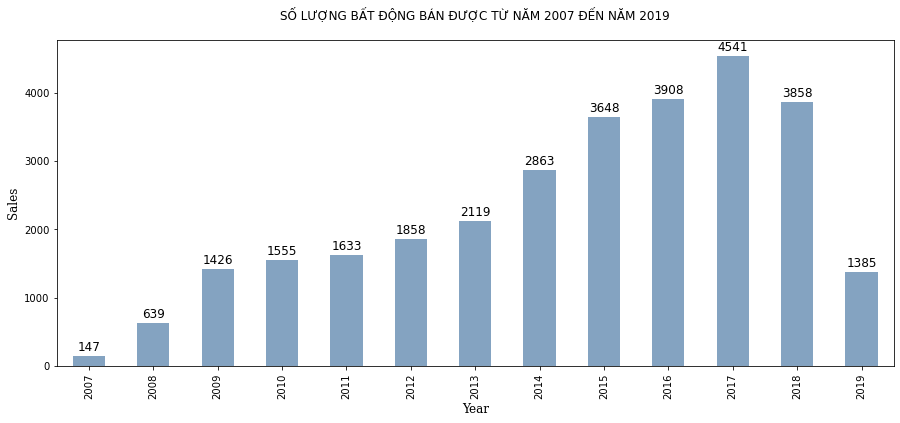

In [81]:
font1 = {'family':'serif','size':12}
c = (0.2, 0.4, 0.6, 0.6)
s = df.datesold.dt.year.value_counts().sort_index(ascending=True).plot.bar(color=c)


plt.title("S·ªê L∆Ø·ª¢NG B·∫§T ƒê·ªòNG B√ÅN ƒê∆Ø·ª¢C T·ª™ NƒÇM 2007 ƒê·∫æN NƒÇM 2019\n")
plt.xlabel("Year",fontdict = font1)
plt.ylabel("Sales",fontdict  = font1)
for i in s.patches:
    ypos = i.get_height() + 30
    xpos = i.get_x() + i.get_width()/2.
    lbl = i.get_height()
    plt.text(xpos, ypos,lbl , ha='center', va='bottom', fontsize=12)  

Nh·∫≠n x√©t: Nh√¨n chung, doanh s·ªë b√°n h√†ng c√≥ chi·ªÅu h∆∞·ªõng tƒÉng d·∫ßn t·ª´ nƒÉm 2007 t·ªõi nƒÉm 2017. S·ªë l∆∞·ª£ng nh√† b√°n ƒë∆∞·ª£c ƒë·∫°t ƒë·ªânh v√†o nƒÉm 2017, l√† 4541 cƒÉn, v√† b·∫Øt ƒë·∫ßu gi·∫£m d·∫ßn t·ªõi 2019.

#### Gi√° b√°n nh√† h√†ng nƒÉm thay ƒë·ªïi theo th·ªùi gian ƒë·ªëi v·ªõi t·∫•t c·∫£ c√°c l·∫ßn b√°n nh√†

Text(0, 0.5, 'Gi√° b√°n (TrƒÉm ngh√¨n USD)')

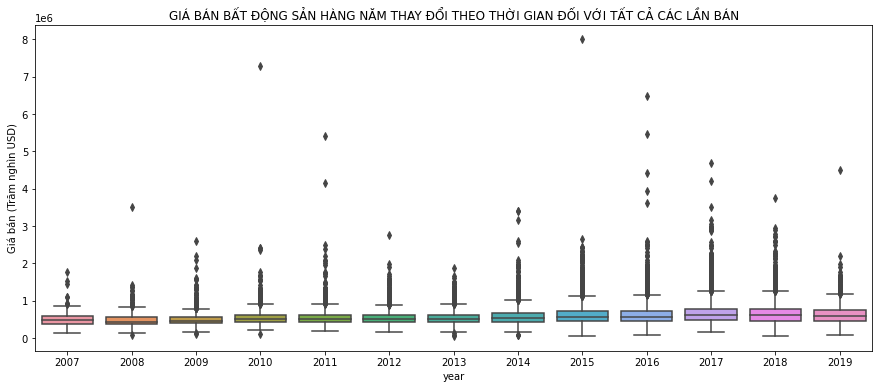

In [82]:
sns.boxplot(x = df['year'], y = df['price'])
plt.title("GI√Å B√ÅN B·∫§T ƒê·ªòNG S·∫¢N H√ÄNG NƒÇM THAY ƒê·ªîI THEO TH·ªúI GIAN ƒê·ªêI V·ªöI T·∫§T C·∫¢ C√ÅC L·∫¶N B√ÅN")
plt.ylabel("Gi√° b√°n (TrƒÉm ngh√¨n USD)")

Nh·∫≠n x√©t:
- Nh√¨n v√†o bi·ªÉu ƒë·ªì, c√≥ th·ªÉ th·∫•y s·ª± ph√¢n b·ªï t·ªïng th·ªÉ c·ªßa gi√° b√°n nh√† h∆°i l·ªách v·ªÅ b√™n tr√°i, kho·∫£ng t·ª´ 2007 - 2013 (t·∫≠p trung nhi·ªÅu h∆°n v√†o gi√° cao h∆°n) v·ªõi doanh s·ªë b√°n nh√† ƒë·∫Øt ƒë·ªè h∆°n v√¨ d·ªØ li·ªáu v·ªÅ gi√° b√°n t·∫≠p trung ·ªü m·ª©c th·∫•p, dao ƒë·ªông ·ªü ph·∫°m vi h·∫πp. 
- C√≤n c√°c nƒÉm tr·ªü v·ªÅ sau cho th·∫•y s·ª± ph√¢n b·ªï gi√° b√°n nh√† k√©m h∆°n v√¨ xu h∆∞·ªõng t·∫≠p trung c·ªßa d·ªØ li·ªáu (trung v·ªã) ·ªü m·ª©c cao, ƒë·ªô dao ƒë·ªông l·ªõn (m·∫∑c d√π s·ª± ph√¢n b·ªï gi√° b√°n nh√† tr√¥ng kh√° gi·ªëng nhau theo th·ªùi gian v·ªõi s·ª± chuy·ªÉn ƒë·ªông d·∫ßn d·∫ßn c·ªßa c√°c khu ƒë·∫•t h·ªôp)

#### S·ªë l∆∞·ª£ng b√°n c·ªßa t·ª´ng lo·∫°i ph√≤ng ng·ªß qua t·ª´ng nƒÉm

In [7]:
df1=df.bedrooms.groupby(df['year']).value_counts(sort= False).reset_index(name='counts')
#S·∫Øp x·∫øp l·∫°i d·ªØ li·ªáu
df2=df1.pivot_table(index='year', values='counts', columns='bedrooms',fill_value=0)
df2.head()

bedrooms  0   1    2    3    4   5
year                              
2007      0   5   16   67   49  10
2008      1  15   57  293  243  30
2009      0  49  152  645  512  68
2010      0  50  151  689  573  92
2011      0  63  155  746  579  90

<AxesSubplot:title={'center':'S·ªê L∆Ø·ª¢NG B√ÅN C·ª¶A T·ª™NG LO·∫†I PH√íNG NG·ª¶ QUA T·ª™NG NƒÇM'}, xlabel='year'>

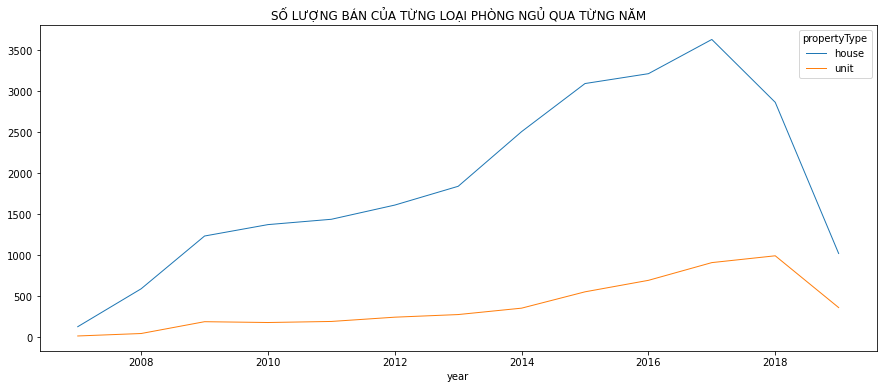

In [83]:
df2.plot(linewidth = '1',title='S·ªê L∆Ø·ª¢NG B√ÅN C·ª¶A T·ª™NG LO·∫†I PH√íNG NG·ª¶ QUA T·ª™NG NƒÇM')

Nh·∫≠n x√©t: Theo bi·ªÉu ƒë·ªì ta th·∫•y lo·∫°i 3 ph√≤ng ng·ªß ƒë∆∞·ª£c b√°n ch·∫°y nh·∫•t, tƒÉng t·ª´ nƒÉm 2007 ƒë·∫øn nƒÉm 2017, lo·∫°i 0 ph√≤ng ng·ªß ƒë∆∞·ª£c b√°n √≠t nh·∫•t v·ªõi 30 cƒÉn trong t·∫•t c·∫£ c√°c nƒÉm.

### Theo t·ª´ng v√πng

#### T·ªïng gi√° tr·ªã b·∫•t ƒë·ªông s·∫£n t·∫•t c·∫£ c√°c nƒÉm theo t·ª´ng v√πng

type
Region 1: house    9443175487
Region 1: unit     1889190035
Region 3: house    6465443379
Region 3: unit      238189735
dtype: int64

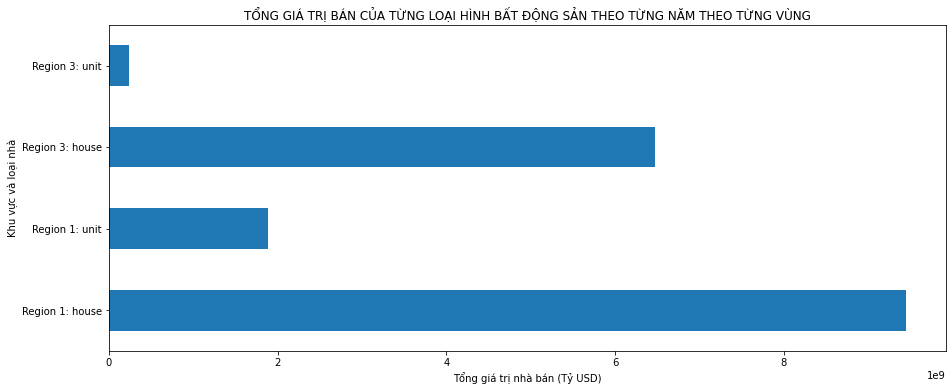

In [9]:
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 

df1 = df.drop(['datesold','bedrooms','postcode', 'region'], axis ='columns')
df1 = df1.groupby(['type','year']).sum().astype(int)
df2 = df1.pivot_table(index = 'year', values = 'price', columns = 'type', fill_value=0)

df2 = df2.sum(axis = 0)

# Tr·ª±c quan h√≥a b·∫±ng bi·ªÉu ƒë·ªì c·ªôt gh√©p
df2.plot(kind = 'barh', title = 'T·ªîNG GI√Å TR·ªä B√ÅN C·ª¶A T·ª™NG LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N THEO T·ª™NG NƒÇM THEO T·ª™NG V√ôNG')
plt.ylabel("Khu v·ª±c v√† lo·∫°i nh√†")
plt.xlabel("T·ªïng gi√° tr·ªã nh√† b√°n (T·ª∑ USD)")
df2.head() 

Nh·∫≠n x√©t: Bi·ªÉu ƒë·ªì tr√™n th·ªÉ hi·ªán t·ªïng gi√° tr·ªã nh√† b√°n theo lo·∫°i h√¨nh ·ªü khu v·ª±c 1 v√† khu v·ª±c 3. Nh√¨n chung, lo·∫°i h√¨nh nh√† ·ªü ƒë∆∞·ª£c ∆∞a chu·ªông h∆°n so v·ªõi lo·∫°i h√¨nh cƒÉn h·ªô ·ªü c·∫£ 2 khu v·ª±c. Lo·∫°i h√¨nh n√†y ·ªü khu v·ª±c 1 c≈©ng chi·∫øm t·ªïng gi√° tr·ªã ƒë∆∞·ª£c b√°n cao nh·∫•t, l√™n ƒë·∫øn $6.465.443.379.

#### Gi√° b√°n trung b√¨nh c·ªßa b·∫•t ƒë·ªông s·∫£n ·ªü t·ª´ng khu v·ª±c bi·∫øn ƒë·ªông theo th·ªùi gian

In [10]:
# X·ª≠ l√Ω d·ªØ li·ªáu ƒë·ªÉ ph√π h·ª£p cho vi·ªác tr·ª±c quan h√≥a
df1 = df.drop(['datesold','bedrooms','propertyType','postcode'], axis ='columns')
df1['type'] = "Region " + df1['region'].astype(str)
df1=df1.groupby(['year','type']).mean().astype(int)
df2=df1.pivot_table(index='year', values='price', columns='type',fill_value=0)
df2.head()

type  Region 1  Region 3
year                    
2007    565565    466367
2008    527929    446889
2009    526406    459901
2010    600439    510026
2011    595923    528459

Text(0, 0.5, 'Gi√° b√°n (USD)')

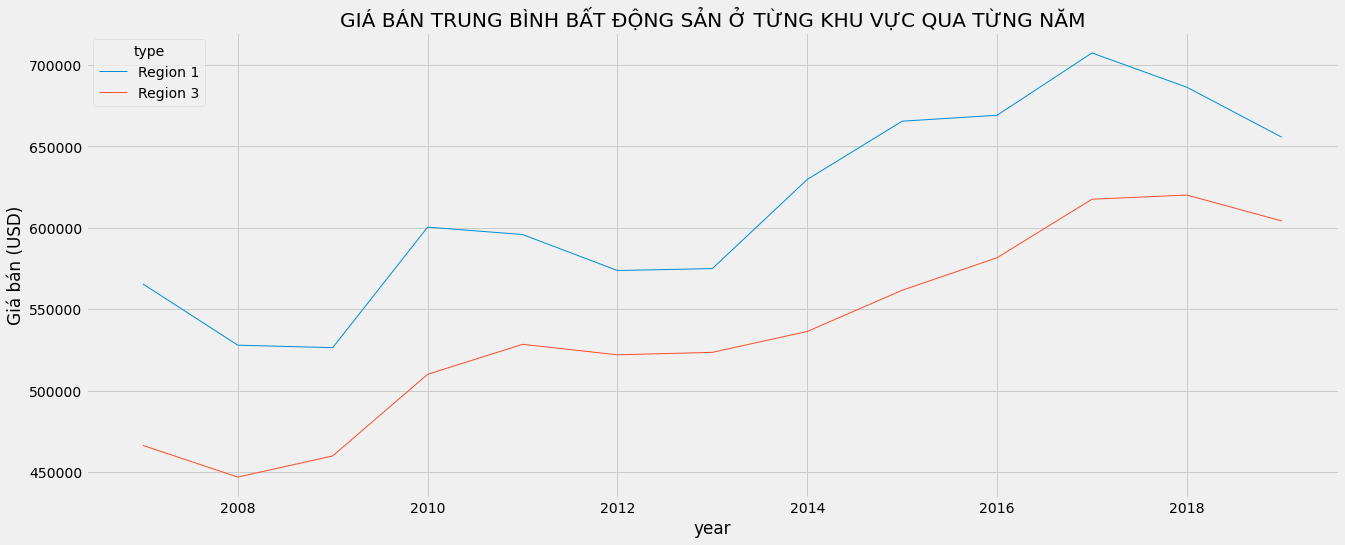

In [12]:
# Tr·ª±c quan h√≥a d·ªØ li·ªáu b·∫±ng bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
df2.plot(linewidth = '1',title='GI√Å B√ÅN TRUNG B√åNH B·∫§T ƒê·ªòNG S·∫¢N ·ªû T·ª™NG KHU V·ª∞C QUA T·ª™NG NƒÇM')
plt.ylabel("Gi√° b√°n (USD)")

Nh·∫≠n x√©t:
Gi√° b·∫•t ƒë·ªông trung b√¨nh ·ªü c·∫£ 2 khu v·ª±c nh√¨n chung c√≥ s·ª± bi·∫øn ƒë·ªông qua c√°c nƒÉm v√† c√≥ xu h∆∞·ªõng chung l√† tƒÉng l√™n. Gi√° b·∫•t ƒë·ªông s·∫£n ·ªü khu v·ª±c 1 lu√¥n cao h∆°n ·ªü khu v·ª±c 3. ƒê·∫∑c ƒëi·ªÉm chung c·ªßa s·ª± bi·∫øn ƒë·ªông l√† t·ª´ nƒÉm 2017, gi√° nh√† gi·∫£m th·∫•p nh·∫•t v√†o kho·∫£ng 2008,2009 sau ƒë√≥ tƒÉng l√™n v√† c√≥ s·ª± gi·∫£m nh·∫π trong 2 nƒÉm 2011, 2012. Sau ƒë√≥ li√™n t·ª•c tƒÉng l√™n v√† ch·∫°m ƒëi·ªÉm ·ªü nƒÉm 2017 sau ƒë√≥ b·∫Øt ƒë·∫ßu gi·∫£m xu·ªëng. V·ªõi khu v·ª±c 1, gi√° b·∫•t ƒë·ªông s·∫£n ch·∫°m m·ªëc cao nh·∫•t v√†o nƒÉm 2017, th·∫•p nh·∫•t v√†o nƒÉm 2009. V·ªõi khu v·ª±c 3, gi√° b·∫•t ƒë·ªông s·∫£n ch·∫°m m·ªëc cao nh·∫•t v√†o nƒÉm 2018, th·∫•p nh·∫•t v√†o nƒÉm 2008.

### Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n

#### S·ªë l∆∞·ª£ng b√°n c·ªßa t·ª´ng lo·∫°i lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n qua t·ª´ng nƒÉm

In [11]:
df1=df.propertyType.groupby(df['year']).value_counts(sort= False).reset_index(name='counts')
df2=df1.pivot_table(index='year', values='counts', columns='propertyType',fill_value=0)
df2.head()

propertyType  house  unit
year                     
2007            130    17
2008            592    47
2009           1235   191
2010           1374   181
2011           1439   194

<AxesSubplot:title={'center':'S·ªê L∆Ø·ª¢NG B√ÅN C·ª¶A T·ª™NG LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N QUA T·ª™NG NƒÇM'}, xlabel='year'>

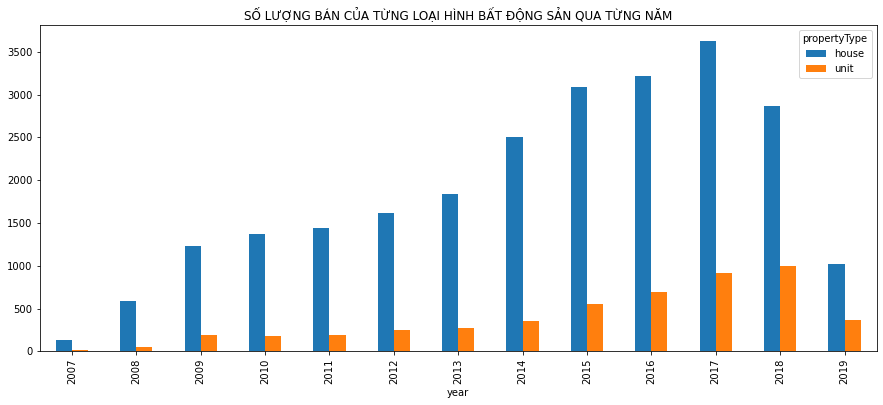

In [12]:
df2.plot(kind='bar', title='S·ªê L∆Ø·ª¢NG B√ÅN C·ª¶A T·ª™NG LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N QUA T·ª™NG NƒÇM' )

Nh·∫≠n x√©t: L∆∞·ª£ng nh√† b√°n ra tƒÉng li√™n t·ª•c t·ª´ nƒÉm 2007 t·ªõi nƒÉm 2017 nh∆∞ng l·∫°i s·ª•t gi·∫£m v√†o nƒÉm 2018 v√† 2019. C√≤n s·ªë l∆∞·ª£ng b√°n cƒÉn h·ªô (unit) c≈©ng tƒÉng nh∆∞ng l∆∞·ª£ng tƒÉng th·∫•p h∆°n so v·ªõi l∆∞·ª£ng b√°n nh√†.

###  Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n theo t·ª´ng khu v·ª±c


#### S·ªë l∆∞·ª£ng b√°n c·ªßa t·ª´ng lo·∫°i lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n theo khu v·ª±c qua t·ª´ng nƒÉm

Text(0, 0.5, '\n Count')

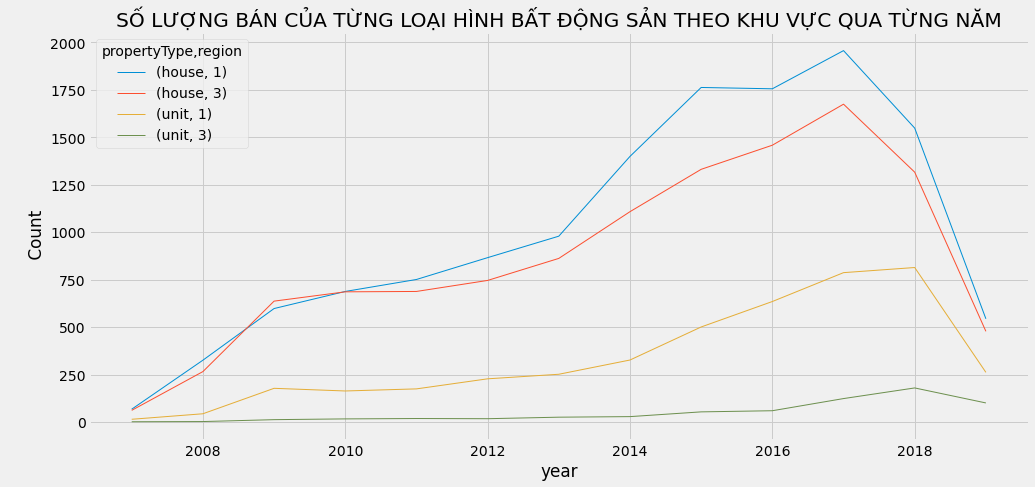

In [15]:
#S·ªë l∆∞·ª£ng b√°n c·ªßa t·ª´ng lo·∫°i propertyType theo region qua t·ª´ng nƒÉm

df1 = df.pivot_table(columns=['propertyType','region'],index=['year'], aggfunc='size')
df1.head(5)
df1.plot(linewidth = '1', figsize=(15,7))
plt.title("S·ªê L∆Ø·ª¢NG B√ÅN C·ª¶A T·ª™NG LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N THEO KHU V·ª∞C QUA T·ª™NG NƒÇM")
plt.ylabel("\n Count")

Nh·∫≠n x√©t: Theo bi·ªÉu ƒë·ªì ta th·∫•y s·ªë l∆∞·ª£ng house, unit ·ªü khu v·ª±c 1 l√† ƒë∆∞·ª£c b√°n nhi·ªÅu nh·∫•t, tƒÉng d·∫ßn theo t·ª´ng nƒÉm ƒë·ªânh ƒëi·ªÉm nh·∫•t l√† kho·∫£ng th·ªùi gian t·ª´ 2014 - 2018.

#### T·ªïng gi√° tr·ªã b·∫•t ƒë·ªông s·∫£n theo t·ª´ng v√πng theo t·ª´ng nƒÉm

Region   Region 1   Region 3
year                        
2007     46941950   29847500
2008    195334000  120213250
2009    408491221  298936018
2010    511574539  358548741
2011    551824810  373620965

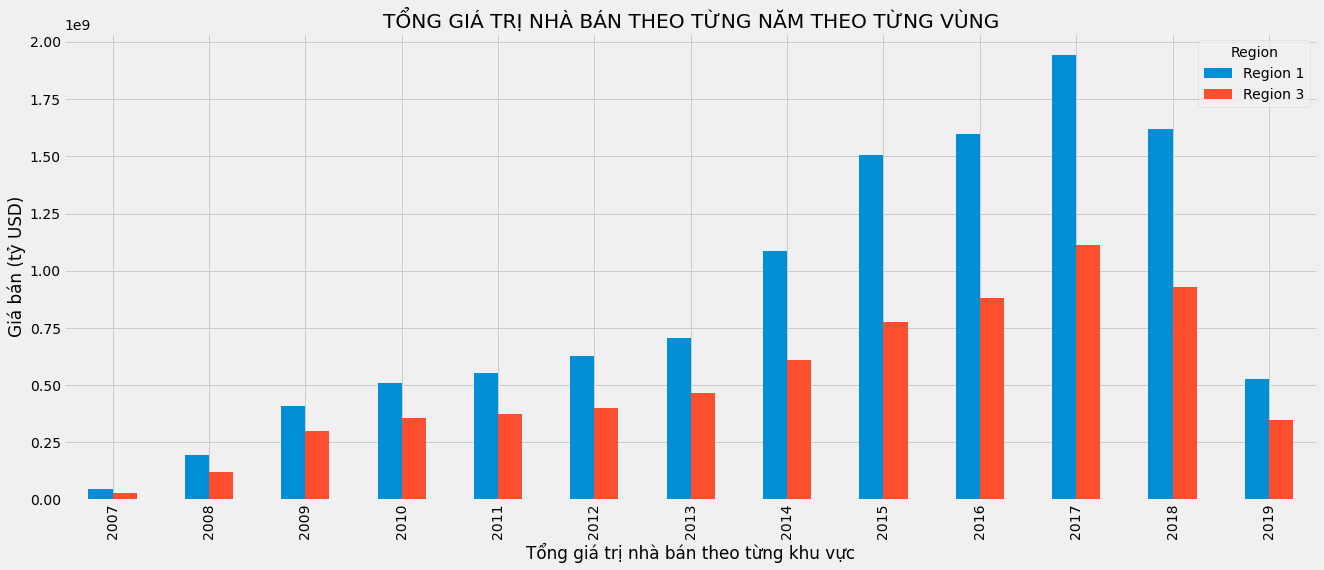

In [16]:
# TH·ªêNG K√ä T·ªîNG GI√Å TR·ªä NH√Ä B√ÅN THEO T·ª™NG NƒÇM (T·ª™ NƒÇM 2007 ƒê·∫æN NƒÇM 2019) THEO T·ª™NG V√ôNG (REGION 1 V√Ä REGION 3)

# X·ª≠ l√Ω d·ªØ li·ªáu ƒë·ªÉ ph√π h·ª£p cho vi·ªác tr·ª±c quan h√≥a
df1 = df.drop(['datesold','bedrooms','propertyType','postcode'], axis ='columns')
df1['Region'] = "Region " + df1['region'].astype(str)
df1 = df1.groupby(['year','Region']).sum().astype(int)
df2 = df1.pivot_table(index = 'year', values = 'price', columns = 'Region', fill_value=0)
df2.head(13)

# Tr·ª±c quan h√≥a b·∫±ng bi·ªÉu ƒë·ªì c·ªôt gh√©p
df2.plot(kind = 'bar', title = 'T·ªîNG GI√Å TR·ªä NH√Ä B√ÅN THEO T·ª™NG NƒÇM THEO T·ª™NG V√ôNG')
plt.ylabel("Gi√° b√°n (t·ª∑ USD)")
plt.xlabel("T·ªïng gi√° tr·ªã nh√† b√°n theo t·ª´ng khu v·ª±c")
df2.head()

Nh·∫≠n x√©t: 
Bi·ªÉu ƒë·ªì tr√™n th·ªÉ hi·ªán s·ª± ph√¢n b·ªë t·ªïng gi√° tr·ªã nh√† b√°n theo t·ª´ng nƒÉm c·ªßa hai khu v·ª±c 1 v√† 3, ta c√≥ th·ªÉ th·∫•y t·ªïng gi√° tr·ªã nh√† b√°n c·ªßa khu v·ª±c 1 lu√¥n cao h∆°n so v·ªõi khu v·ª±c 3 ·ªü t·∫•t c·∫£ c√°c nƒÉm. ƒêi·ªÅu n√†y cho th·∫•y th·ªã tr∆∞·ªùng nh√† ƒë·∫•t ·ªü khu v·ª±c 1 nƒÉng ƒë·ªông h∆°n so v·ªõi khu v·ª±c 3. 
T·ªïng gi√° tr·ªã nh√† b√°n c·ªßa c·∫£ 2 khu v·ª±c c√≥ xu h∆∞·ªõng tƒÉng d·∫ßn trong m·ªôt th·∫≠p k·ª∑ (t·ª´ nƒÉm 2007 ƒë·∫øn nƒÉm 2017), c·ª• th·ªÉ l√† t·ªïng gi√° tr·ªã ƒë√£ ƒë·∫°t m·ª©c cao nh·∫•t v√†o nƒÉm 2017 v·ªõi 1.940.566.595 ·ªü khu v·ª±c 1 v√† 1.110.442.989 ·ªü khu v·ª±c 3.
NƒÉm 2018, t·ªïng gi√° tr·ªã nh√† b√°n c√≥ xu h∆∞·ªõng gi·∫£m so v·ªõi nƒÉm tr∆∞·ªõc ·ªü c·∫£ 2 khu vuc, c·ª• th·ªÉ l√† ·ªü khu v·ª±c 1, t·ªïng gi√° tr·ªã gi·∫£m t·ª´ 1.940.566.595 xu·ªëng 1.621.215.228 (gi·∫£m 319.351.367) ·ªü khu v·ª±c 3, t·ªïng gi√° tr·ªã gi·∫£m t·ª´ 1.110.442.989 xu·ªëng 927.769.395 (gi·∫£m 182.673.594). 
NƒÉm 2019, t·ªïng gi√° tr·ªã nh√† b√°n ti·∫øp t·ª•c c√≥ xu h∆∞·ªõng gi·∫£m m·∫°nh, ·ªü khu v·ª±c 1, t·ªïng gi√° tr·ªã gi·∫£m t·ª´ $1.621.215.228 xu·ªëng 528.492.633 (gi·∫£m 1.092.722.595). ·ªû khu v·ª±c 2, t·ªïng gi√° tr·ªã gi·∫£m t·ª´ 927.769.395 xu·ªëng 349.852.510 (gi·∫£m 577.916.885).

#### Gi√° b√°n trung b√¨nh b·∫•t ƒë·ªông s·∫£n ·ªü t·ª´ng khu v·ª±c qua t·ª´ng nƒÉm theo lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n

In [17]:
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 
df1 = df.drop(['datesold','bedrooms','propertyType'], axis ='columns')
df1=df1.groupby(['year','type']).mean().astype(int)
df2=df1.pivot_table(index='year', values='price', columns='type',fill_value=0)
df2.head()

type  Region 1: house  Region 1: unit  Region 3: house  Region 3: unit
year                                                                  
2007           605544          384330           467911          418500
2008           554522          330904           448565          298316
2009           570122          379540           461976          358230
2010           636244          450232           512476          411176
2011           637663          416796           531744          409526

Text(0, 0.5, 'Gi√° b√°n (USD)')

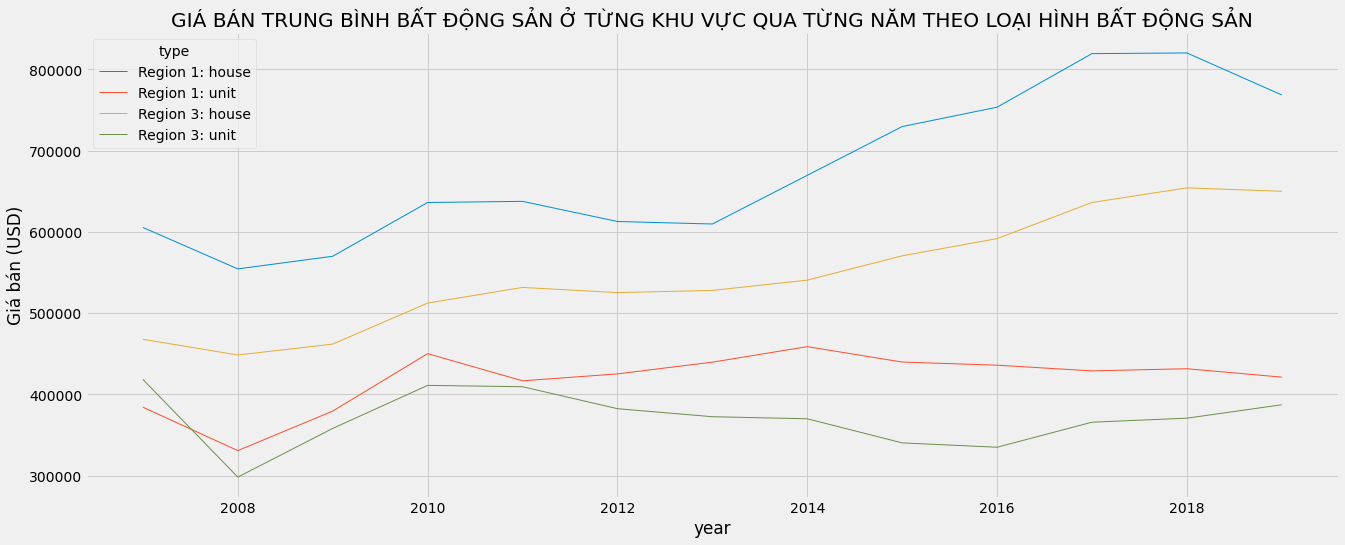

In [18]:
# Tr·ª±c quan h√≥a d·ªØ li·ªáu b·∫±ng bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
df2.plot(linewidth = '1',title='GI√Å B√ÅN TRUNG B√åNH B·∫§T ƒê·ªòNG S·∫¢N ·ªû T·ª™NG KHU V·ª∞C QUA T·ª™NG NƒÇM THEO LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N')
plt.ylabel("Gi√° b√°n (USD)")

Nh·∫≠n x√©t:
Ta c√≥ th·ªÉ th·∫•y r√µ r√†ng, gi√° c·ªßa nh√† ·ªü th√¨ lu√¥n cao h∆°n ƒë√°ng k·ªÉ so v·ªõi gi√° c·ªßa cƒÉn h·ªô v√† gi√° ·ªü khu v·ª±c 1 lu√¥n cao h∆°n ·ªü khu v·ª±c 3 ngo·∫°i tr·ª´ v√†o nƒÉm 2007, gi√° c·ªßa cƒÉn h·ªô ·ªü khu v·ª±c 3 l·∫°i cao h∆°n.
Gi√° c·∫£ c·ªßa cƒÉn h·ªô lu√¥n giao ƒë·ªông trong kho·∫£ng t·ª´ 300000 ƒë√¥ ƒë·∫øn h∆°n 450000 ƒë√¥. Ngo·∫°i tr·ª´ v√†o kho·∫£ng th·ªùi gian t·ª´ 2007 ƒë·∫øn 2010 c√≥ s·ª± bi·∫øn ƒë·ªông m·∫°nh th√¨ nh√¨n chung gi√° c·ªßa cƒÉn h·ªô c√≥ s·ª± ·ªïn ƒë·ªãnh h∆°n, kh√¥ng thay ƒë·ªïi qu√° nhi·ªÅu.
Gi√° c·∫£ c·ªßa nh√† ·ªü th√¨ giao ƒë·ªông trong kho·∫£ng t·ª´ 450000 ƒë√¥ ƒë·∫øn h∆°n 800000 ƒë√¥. Gi√° c·ªßa nh√† ·ªü nh√¨n chung th∆∞·ªùng tƒÉng qua c√°c nƒÉm v√† gi√° ·ªü nƒÉm 2007 so v·ªõi nƒÉm 2019 th√¨ c√≥ s·∫Ω th·∫•p h∆°n r√µ r√†ng. 


### Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n theo ph√≤ng ng·ªß c·ªßa t·ª´ng khu v·ª±c


#### S·ªë l∆∞·ª£ng b√°n b·∫•t ƒë·ªông s·∫£n theo t·ª´ng lo·∫°i ph√≤ng ng·ªß c·ªßa m·ªói lo·∫°i lo·∫°i h√¨nh

In [13]:
df_solution = df.pivot_table(index=['propertyType','bedrooms'], aggfunc='size').unstack()
df_solution

bedrooms       0     1     2      3      4     5
propertyType                                    
house         19    95   806  11281  10404  1947
unit          11  1532  2792    652     38     3

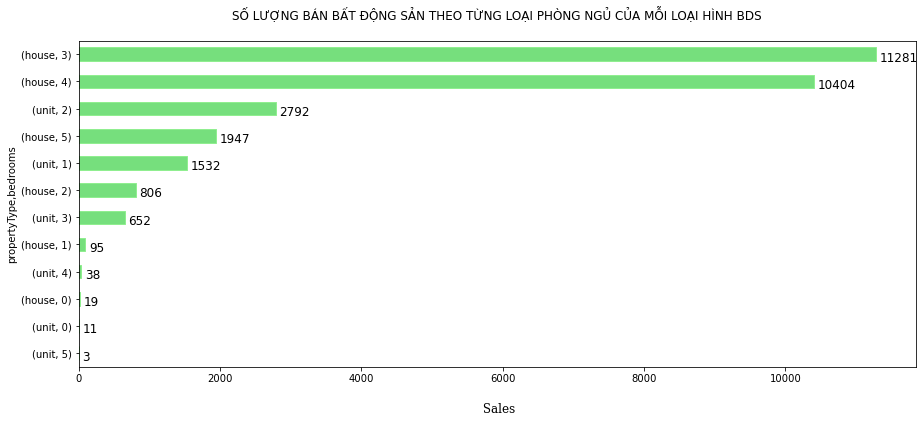

In [14]:
s = df.value_counts(['propertyType','bedrooms']).sort_values(ascending=True).plot.barh(color='#76DF7D',edgecolor='#90EE90')

plt.title("S·ªê L∆Ø·ª¢NG B√ÅN B·∫§T ƒê·ªòNG S·∫¢N THEO T·ª™NG LO·∫†I PH√íNG NG·ª¶ C·ª¶A M·ªñI LO·∫†I H√åNH BDS\n")
plt.xlabel("\n Sales",fontdict = font1)

for i in s.patches:
    xpos = i.get_width() + 50
    ypos = i.get_y()
    lbl = i.get_width()
    plt.text(xpos, ypos, lbl, fontsize=12)

Nh·∫≠n x√©t: Theo bi·ªÉu ƒë·ªì, s·ªë l∆∞·ª£ng lo·∫°i house v·ªõi 3 ph√≤ng ng·ªß l√† b√°n ch·∫°y nh·∫•t t·ª´ tr∆∞·ªõc t·ªõi nay, ƒë·∫°t 11,281 cƒÉn v√† th·∫•p nh·∫•t l√† lo·∫°i unit 5 ph√≤ng ng·ªß, ch·ªâ ƒë·∫°t 3 cƒÉn. Ph·∫ßn l·ªõn doanh s·ªë ƒë·∫øn t·ª´ lo·∫°i house t·ª´ 3-5 ph√≤ng ng·ªß v√† lo·∫°i unit v·ªõi 2 ph√≤ng ng·ªß.

#### Gi√° b√°n trung b√¨nh b·∫•t ƒë·ªông s·∫£n t·∫•t c·∫£ c√°c nƒÉm ·ªü t·ª´ng khu v·ª±c theo lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n v√† ph√≤ng ng·ªß

In [22]:
# GI√Å B√ÅN TRUNG B√åNH B·∫§T ƒê·ªòNG S·∫¢N T·∫§T C·∫¢ C√ÅC NƒÇM ·ªû T·ª™NG KHU V·ª∞C THEO LO·∫†I H√åNH V√Ä PH√íNG NG·ª¶
df1 = df
df1['type'] = "Region " + df1['region'].astype(str) + ": " + df1['propertyType'] 
df1 = df.drop(['datesold','propertyType'], axis ='columns')
df1=df1.groupby(['bedrooms','type']).mean().astype(int)
df2=df1.pivot_table(index='type', values='price', columns='bedrooms',fill_value=0)
df2.head()

bedrooms              0       1       2       3       4        5
type                                                            
Region 1: house  730750  349605  522611  615281  796374  1025645
Region 1: unit   308954  340701  438502  608830  708454  1146333
Region 3: house  528000  347300  393046  466986  641538   790644
Region 3: unit        0  289901  370916  466193  550000        0

Text(0.5, 0, 'Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n theo khu v·ª±c')

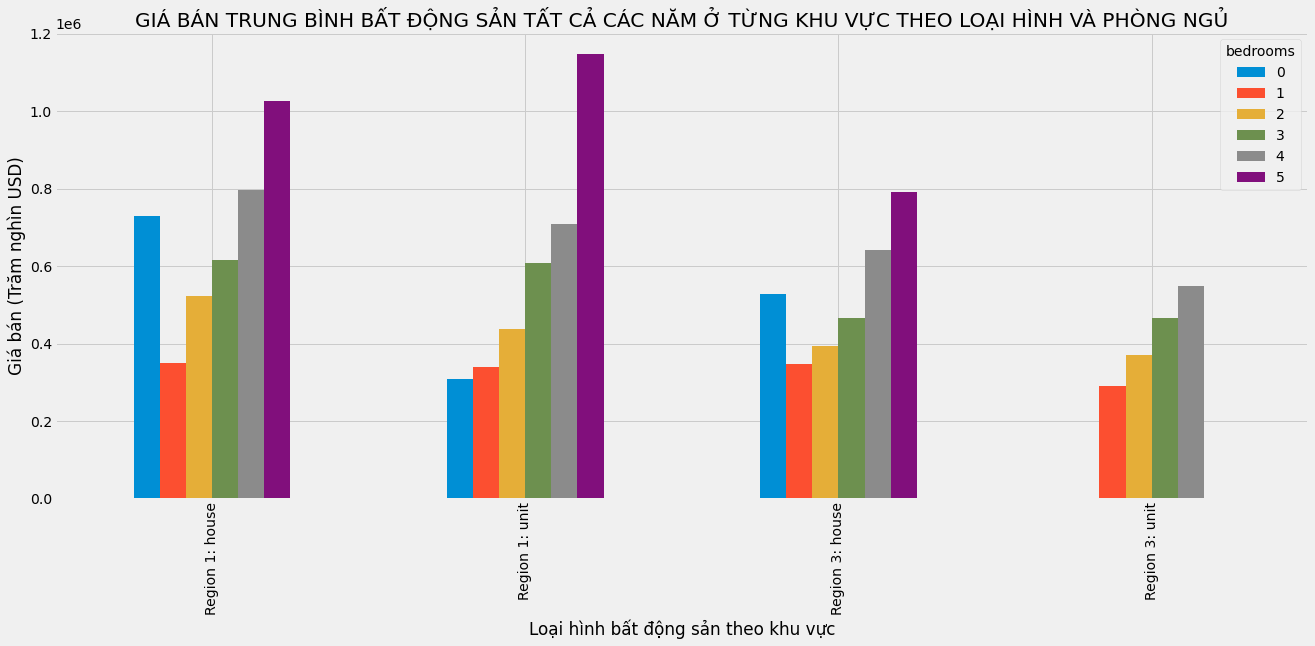

In [23]:
df2.plot(figsize=(20,8),kind='bar', title='GI√Å B√ÅN TRUNG B√åNH B·∫§T ƒê·ªòNG S·∫¢N T·∫§T C·∫¢ C√ÅC NƒÇM ·ªû T·ª™NG KHU V·ª∞C THEO LO·∫†I H√åNH V√Ä PH√íNG NG·ª¶')
plt.ylabel("Gi√° b√°n (TrƒÉm ngh√¨n USD)")
plt.xlabel("Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n theo khu v·ª±c")

 Nh·∫≠n x√©t: 
- Nh√¨n v√†o bi·ªÉu ƒë·ªì, gi√° c·ªßa nh√† ·ªü theo ph√≤ng ng·ªß c√≥ xu h∆∞·ªõng cao h∆°n so v·ªõi gi√° c·ªßa cƒÉn h·ªô theo ph√≤ng ng·ªß v√† gi√° ·ªü khu v·ª±c 1 lu√¥n cao h∆°n ·ªü khu v·ª±c 3.
- Gi√° c·∫£ c·ªßa cƒÉn h·ªô ·ªü khu v·ª±c 1 v√† 3 ƒë·ªÅu c√≥ xu h∆∞·ªõng tƒÉng theo s·ªë l∆∞·ª£ng ph√≤ng tƒÉng d·∫ßn. C·ª• th·ªÉ gi√° ·ªü cƒÉn h·ªô kh√¥ng c√≥ ph√≤ng ng·ªß s·∫Ω th·∫•p nh·∫•t v√† gi√° ·ªü cƒÉn h·ªô c√≥ 5 ph√≤ng ng·ªß s·∫Ω cao nh·∫•t.
  ->Gi√° c·∫£ cƒÉn h·ªô t·ª∑ l·ªá thu·∫≠n v·ªõi s·ªë l∆∞·ª£ng ph√≤ng ng·ªß trong cƒÉn h·ªô ƒë√≥
- Gi√° c·∫£ nh√† ·ªü c·ªßa khu v·ª±c 1 v√† 3 c√≥ s·ª± bi·∫øn ƒë·ªông nh·∫π, ƒë·∫∑c bi·ªát l√† ƒë·ªëi v·ªõi nh√† kh√¥ng c√≥ ph√≤ng ng·ªß. Gi√° nh√† ·ªü c√≥ 1 ƒë·∫øn 5 ph√≤ng ng·ªß s·∫Ω c√≥ chi·ªÅu h∆∞·ªõng tƒÉng d·∫ßn theo s·ªë l∆∞·ª£ng ph√≤ng ng·ªß, t∆∞∆°ng t·ª± nh∆∞ gi√° c·∫£ c·ªßa cƒÉn h·ªô.
Tuy nhi√™n, gi√° nh√† ·ªü kh√¥ng c√≥ ph√≤ng ng·ªß s·∫Ω n·∫±m ·ªü gi·ªØa gi√° c·ªßa nh√† c√≥ 3 v√† 4 ph√≤ng ng·ªß. L√≠ gi·∫£i ƒëi·ªÅu n√†y c√≥ th·ªÉ l√† do nh·ªØng ng∆∞·ªùi c√≥ ƒëi·ªÅu ki·ªán v√† s·ªëng m·ªôt m√¨nh th∆∞·ªùng s·∫Ω mua nh·ªØng ng√¥i nh√† ·ªü v·ªã tr√≠ g·∫ßn khu trung t√¢m th√†nh ph·ªë v·ªõi gi√° thu√™ m·∫∑t b·∫±ng cao ƒë·ªÉ ti·ªán cho vi·ªác sinh ho·∫°t v√† l√†m vi·ªác h∆°n.

## Predictive Analysis (Time-series Forecasting)

In [48]:
# time-series prediction packages

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX # sarimax algorithm for actual predictions

import warnings
warnings.filterwarnings("ignore")  #Specify to ignore warning messages

In [49]:
df = pd.read_csv('raw_sales.csv')

### Sales Forecast 

#### Data Preprosessing

In [50]:
df['datesold'] = pd.to_datetime(df['datesold'])
df['month'] = df['datesold'].dt.strftime('%Y-%m')

ts=df['month'].value_counts().sort_index(ascending=True)
ts #dang series

2007-02      2
2007-03      3
2007-04      3
2007-05      2
2007-06      6
          ... 
2019-03    236
2019-04    212
2019-05    220
2019-06    126
2019-07    250
Name: month, Length: 150, dtype: int64

In [51]:
ts = pd.DataFrame(ts).reset_index()
ts.columns = ['Month', 'Sales']
ts['Month'] = pd.to_datetime(ts['Month'], format = '%Y-%m-%d')

In [52]:
ts.set_index(['Month'], inplace = True)
ts

Sales
Month            
2007-02-01      2
2007-03-01      3
2007-04-01      3
2007-05-01      2
2007-06-01      6
...           ...
2019-03-01    236
2019-04-01    212
2019-05-01    220
2019-06-01    126
2019-07-01    250

[150 rows x 1 columns]

#### Check Stationarity

<AxesSubplot:xlabel='Month'>

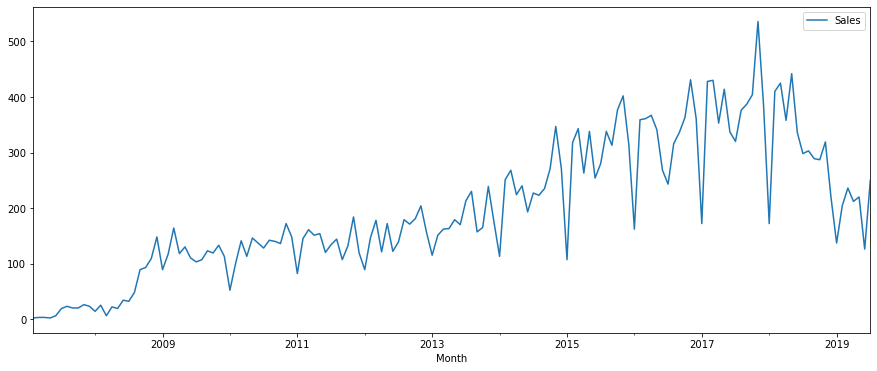

In [20]:
ts.plot()

In [ ]:
#C·∫•u tr√∫c c·ªßa m√¥ h√¨nh SARIMA 
Seasonal Autoregressive Integrated Moving Average SARIMA(p,d,q)(P,D,Q)m

p: the lag order (number of lag observations included)
d: the degree of differencing needed for stationarity (number of times the data is differenced)
q: the order of the moving average
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

#### Build SARIMAX Model with exogenous variable

In [53]:
# multiplicative seasonal component
result_mul = seasonal_decompose(ts['Sales'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
ts['month'] = ts.index.month
new_ts = pd.merge(ts, seasonal_index, how='left', on='month')
new_ts.columns = ['value', 'month', 'seasonal_index']
new_ts.index = ts.index  # reassign the index.
new_ts

value  month  seasonal_index
Month                                   
2007-02-01      2      2        1.054283
2007-03-01      3      3        1.136708
2007-04-01      3      4        0.992926
2007-05-01      2      5        1.171618
2007-06-01      6      6        0.865870
...           ...    ...             ...
2019-03-01    236      3        1.136708
2019-04-01    212      4        0.992926
2019-05-01    220      5        1.171618
2019-06-01    126      6        0.865870
2019-07-01    250      7        1.078985

[150 rows x 3 columns]

In [54]:
import pmdarima as pm
sxmodel = pm.auto_arima(new_ts[['value']], exogenous=new_ts[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal= True,  
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1403.359, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1554.637, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.543, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1473.507, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1563.727, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1420.090, Time=0.20 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1405.346, Time=0.79 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1405.349, Time=1.88 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1406.708, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1406.832, Time=2.84 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1415.356, Time=0.53 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1405.204, Time=1.07 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1405.006, Time=1.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1553.048, Time=0.51 sec
 ARIMA(0,0,2)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -695.856
Date:                            Mon, 30 Aug 2021   AIC                           1401.711
Time:                                    17:23:50   BIC                           1416.347
Sample:                                02-01-2007   HQIC                          1407.659
                                     - 07-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
seasonal_index    -0.0024   6623.710  -3.62e-07      1.000    -1.3e+04     1.3e+04
ar.L1              0.9698      0.021     45.353      0.000       0.928       1.012
ma.L1             -0.4780      0.074     -6.446      0.000      -0.623      -0.333
ma.S.L12          -0.4644      0.072     -6.487      0.000      -0.605      -0.324
sigma2          1364.3535    145.155      9.399      0.000    1079.855    1648.852
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 8.46
Prob(Q):                              0.79   Prob(JB):                         0.01
Heteroskedasticity (H):               4.38   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

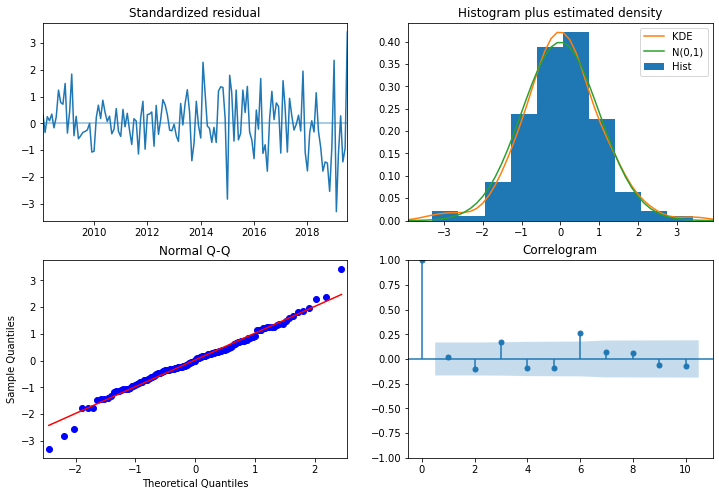

In [25]:
sxmodel.plot_diagnostics(figsize=(12,8))
plt.show()

Sai s·ªë d∆∞ d∆∞·ªùng nh∆∞ dao ƒë·ªông xung quanh gi√° tr·ªã trung b√¨nh b·∫±ng 0 v√† c√≥ ph∆∞∆°ng sai ƒë·ªìng nh·∫•t.
Histogram plus estimated density plot: ƒê∆∞·ªùng KDE theo s√°t v·ªõi ƒë∆∞·ªùng N (0,1). ƒê√¢y l√† m·ªôt d·∫•u hi·ªáu t·ªët cho th·∫•y ph·∫ßn d∆∞ ƒë∆∞·ª£c ph√¢n ph·ªëi b√¨nh th∆∞·ªùng.
Bi·ªÉu ƒë·ªì Q-Q: ph√¢n ph·ªëi c√≥ th·ª© t·ª± c·ªßa ph·∫ßn d∆∞ (ch·∫•m xanh lam) tu√¢n theo xu h∆∞·ªõng tuy·∫øn t√≠nh c·ªßa c√°c m·∫´u ƒë∆∞·ª£c l·∫•y t·ª´ ph√¢n ph·ªëi chu·∫©n chu·∫©n v·ªõi N (0, 1) 

#### Predict the next 24 months

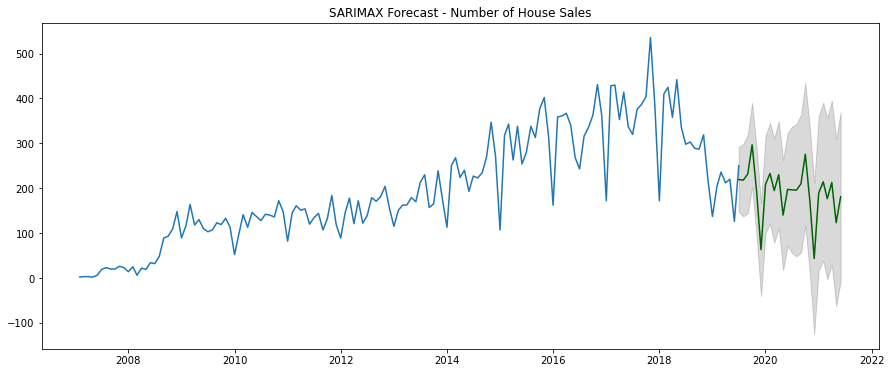

In [27]:
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.values, 1).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(new_ts.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(new_ts['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast - Number of House Sales")
plt.show()

<AxesSubplot:>

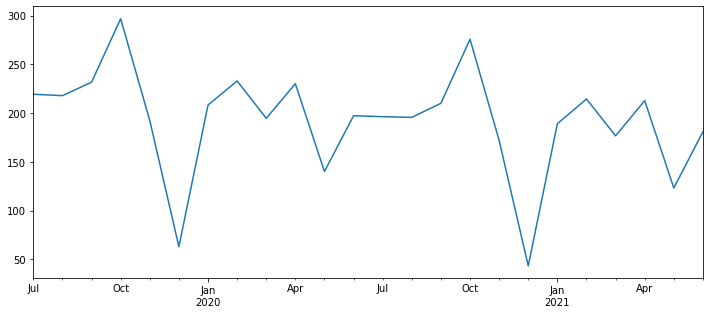

In [70]:
fitted_series.plot(figsize=(12,5))

Bi·ªÉu ƒë·ªì d·ª± ƒëo√°n mang xu h∆∞·ªõng v√† t√≠nh m√πa c·ªßa b·ªô d·ªØ li·ªáu 3 nƒÉm g·∫ßn ƒë√¢y. Nh√¨n chung, s·ªë l∆∞·ª£ng b·∫•t ƒë·ªông s·∫£n b√°n trong t∆∞∆°ng lai ƒë∆∞·ª£c d·ª± ƒëo√°n c√≥ xu h∆∞·ªõng tƒÉng so v·ªõi 3 nƒÉm g·∫ßn ƒë√¢y, ƒë·∫°t d·ªânh v√†o c√°c th√°ng 10 nƒÉm 2019, 2020 v√† gi·∫£m m·∫°nh v√†o c√°c th√°ng 12. Sau ƒë√≥ tƒÉng m·∫°nh v√† duy tr√¨ ·ªïn ƒë·ªãnh trong c√°c th√°ng gi·ªØa nƒÉm.

### Price Forecasting

#### Data Preprocessing

In [55]:
# X·ª≠ l√Ω d·ªØ li·ªáu ƒë·ªÉ ph√π h·ª£p cho vi·ªác tr·ª±c quan h√≥a
df = df.drop(['bedrooms','propertyType','postcode'], axis ='columns')
tp= df.groupby(df['month']).mean().astype(int)

In [56]:
tp.reset_index(drop=False, inplace=True)
tp

month   price
0    2007-02  407500
1    2007-03  339333
2    2007-04  798000
3    2007-05  339500
4    2007-06  520333
..       ...     ...
145  2019-03  651666
146  2019-04  655325
147  2019-05  641491
148  2019-06  703275
149  2019-07  583192

[150 rows x 2 columns]

In [57]:
tp['month'] = pd.to_datetime(tp.month)
tp = tp.set_index(tp.month)

tp.drop('month', axis = 1, inplace = True)
tp

price
month             
2007-02-01  407500
2007-03-01  339333
2007-04-01  798000
2007-05-01  339500
2007-06-01  520333
...            ...
2019-03-01  651666
2019-04-01  655325
2019-05-01  641491
2019-06-01  703275
2019-07-01  583192

[150 rows x 1 columns]

#### Check Stationarity

<AxesSubplot:xlabel='month'>

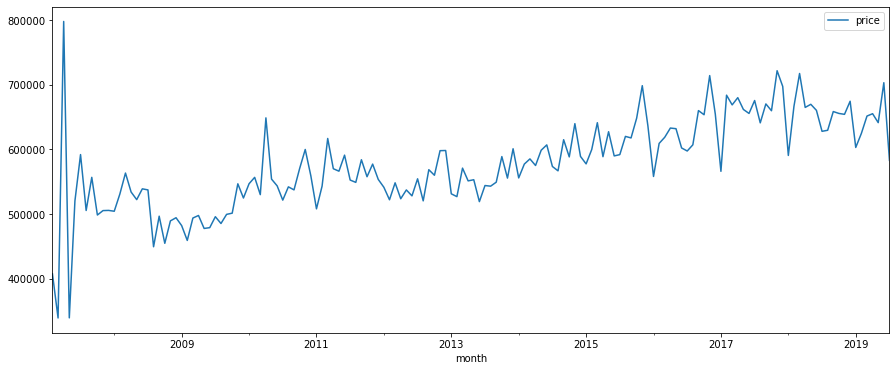

In [32]:
tp.plot()

 Xu h∆∞·ªõng c·ªßa chu·ªói c√≥ xu h∆∞·ªõng l√™n xu·ªëng ü°∫ Chu·ªói kh√¥ng d·ª´ng

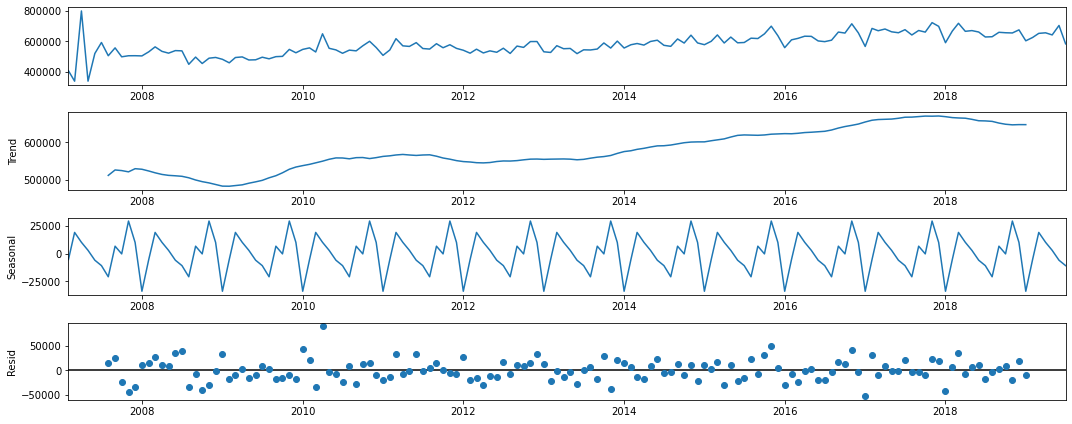

In [33]:
#S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p ph√¢n t√≠ch (decomposition method)
result = seasonal_decompose(tp, model='ad')
result.plot();

Bi·ªÉu ƒë·ªì cho th·∫•y d·ªØ li·ªáu c√≥ c·∫£ xu h∆∞·ªõng v√† t√≠nh th·ªùi v·ª•. ƒêi·ªÅu ƒë√≥ c√≥ nghƒ©a l√† n√≥ not stationary.

In [34]:
#Ki·ªÉm tra th·ªëng k√™ b·∫±ng Dickey-Fuller test
result = adfuller(tp)
print('ADF result:', result[0])
print('p-value = ', result[1])
print('#Lags = ', result[2])
critical_values = result[4]
print('Number of observation used:', result[3])
for key, value, in critical_values.items():
  print("critical values (%s): %.3f" % (key, value))

ADF result: -0.6602114320589664
p-value =  0.8567883077562706
#Lags =  13
Number of observation used: 136
critical values (1%): -3.479
critical values (5%): -2.883
critical values (10%): -2.578


p-value > 0.05 v√† tr·ªã tuy·ªát ƒë·ªëi c·ªßa ADF statistic c√≤n l·ªõn h∆°n c√°c Critical value 1%, 5% v√† 10% 
ü°∫ Chu·ªói ch∆∞a d·ª´ng. Do ƒë√≥, ta ti·∫øn h√†nh bi·∫øn ƒë·ªïi l√†m cho chu·ªói c√≥ t√≠nh d·ª´ng

#### Make series stationary & determine the d value

In [35]:
#l·∫•y sai ph√¢n c·ªßa chu·ªói
tp_diff = tp.diff()
tp_diff.dropna(inplace = True)
result = adfuller(tp_diff)
print('ADF result', result[0])
print('p-value = ', result[1])
print('#Lag = ', result[2])
critical_values = result[4]
print('Number of observation used:', result[3])
for key, value, in critical_values.items():
  print("critical values (%s): %.3f" % (key, value))

ADF result -5.303755431080508
p-value =  5.378421428851641e-06
#Lag =  10
Number of observation used: 138
critical values (1%): -3.479
critical values (5%): -2.883
critical values (10%): -2.578


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

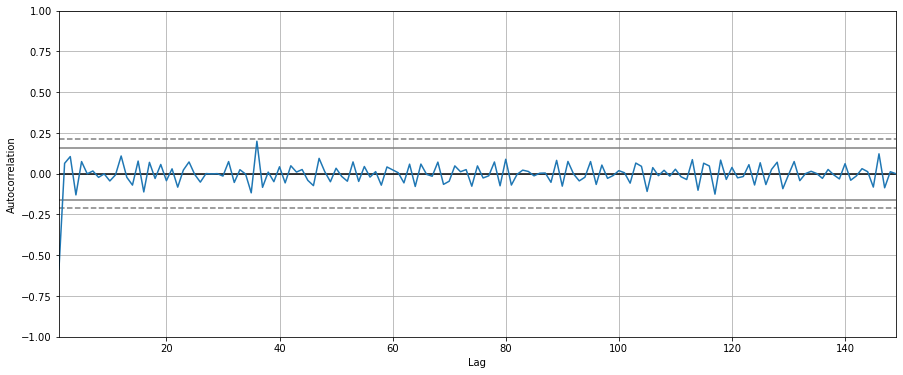

In [36]:
pd.plotting.autocorrelation_plot(tp_diff)

Chu·ªói ƒë√£ d·ª´ng. Nh∆∞ v·∫≠y d = 1

#### Build ARIMA model

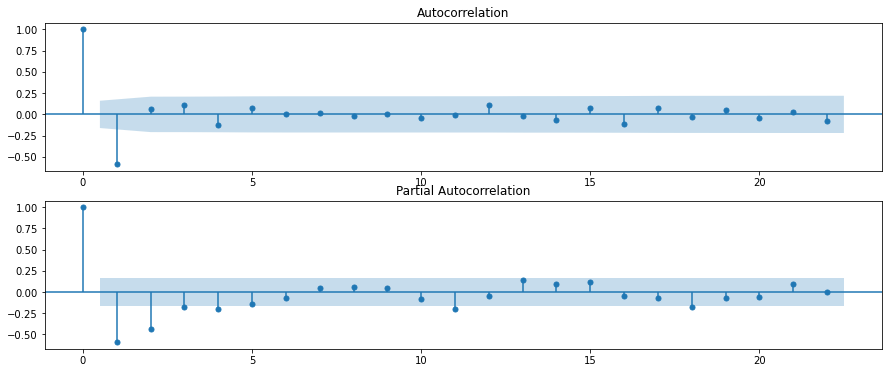

In [37]:
####  Finding the order of differencing. 
plt.subplot(211)
plot_acf(tp_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(tp_diff, ax=plt.gca())
plt.show()

#D·ª±a v√†o bi·ªÉu ƒë·ªì ACF ƒë·ªÉ ch·ªçn b·∫≠c q cho MA
Sau m·ªôt ƒë·ªô tr·ªÖ 1 lag n·∫±m ngo√†i kho·∫£ng tin c·∫≠y, c√°c gi√° tr·ªã gi·∫£m d·∫ßn v·ªÅ 0
v√† nƒÉm trong d√£y m√†u xanh (n·∫±m trong ƒë·ªô tin c·∫≠y 95%), n√™n ta c√≥ th·ªÉ ch·ªçn q thu·ªôc (0,1)

#D·ª±a v√†o bi·ªÉu ƒë·ªì c·ªßa PACF ƒë·ªÉ x√°c ƒë·ªãnh p cho AR
Ta th·∫•y r·∫±ng sau sau m·ªôt ƒë·ªô tr·ªÖ 2 lags n·∫±m ngo√†i kho·∫£ng tin c·∫≠y, c√°c gi√° tr·ªã gi·∫£m d·∫ßn v·ªÅ 0 v√† n·∫±m trong d√£y m√†u xanh (n·∫±m trong ƒë·ªô tin c·∫≠y 95%). N√™n ta c√≥ th·ªÉ ch·ªçn p thu·ªôc (0,2)

In [ ]:
# Finding model parameters by grid search

In [58]:
import itertools
p = d = q = range(3) #0,1,2
pdq = list(itertools.product(p, d, q))     

In [59]:
AIC_df = pd.DataFrame({}, columns = ['param', 'AIC'])

for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tp, order = param, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            #print('ARIMA{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[param, results.aic]], columns = ['param', 'AIC'])
            AIC_df = AIC_df.append(temp, ignore_index = True)
            del temp
        except:
            continue

In [60]:
min_aic = AIC_df.sort_values(by = 'AIC').iloc[0]    #Row with minimum AIC value
model = sm.tsa.statespace.SARIMAX(tp, order = min_aic.param, enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  150
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1725.486
Date:                Mon, 30 Aug 2021   AIC                           3458.972
Time:                        17:24:14   BIC                           3470.906
Sample:                    02-01-2007   HQIC                          3463.821
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4191      0.050      8.437      0.000       0.322       0.516
ma.L1         -1.1894      0.085    -14.071      0.000      -1.355      -1.024
ma.L2          0.3348      0.083      4.047      0.0

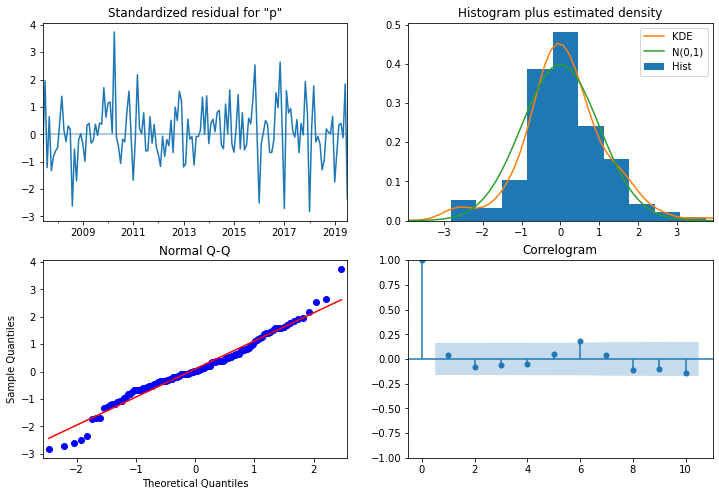

In [42]:
results.plot_diagnostics(figsize=(12,8))
plt.show()

#### Forecasting price of next 24 months

In [61]:
pred_uc = results.get_forecast(steps=24)    
pred_ci = pred_uc.conf_int()   
pred_ci

lower price    upper price
2019-08-01  579203.730825  704063.476128
2019-09-01  576974.139256  705086.017789
2019-10-01  574967.901493  706586.411430
2019-11-01  573083.340312  708258.986118
2019-12-01  571276.655113  709976.833134
2020-01-01  569527.401791  711688.856617
2020-02-01  567825.161804  713375.494520
2020-03-01  566163.988704  715030.129181
2020-04-01  564540.013889  716651.363901
2020-05-01  562950.394760  718239.834725
2020-06-01  561392.843663  719796.904597
2020-07-01  559865.410341  721324.136249
2020-08-01  558366.376053  722823.086022
2020-09-01  556894.197671  724295.228987
2020-10-01  555447.474797  725741.937017
2020-11-01  554024.928063  727164.477531
2020-12-01  552625.383264  728564.019724
2021-01-01  551247.758903  729941.642992
2021-02-01  549891.055937  731298.345501
2021-03-01  548554.349093  732635.052152
2021-04-01  547236.779407  733952.621759
2021-05-01  545937.547722  735251.853410
2021-06-01  544655.909013  736533.492105
2021-07-01  543391.167377  737798.233734

In [62]:
#Take exponential function
pred_uc = pred_uc.predicted_mean
pred_uc

2019-08-01    641633.603476
2019-09-01    641030.078522
2019-10-01    640777.156461
2019-11-01    640671.163215
2019-12-01    640626.744123
2020-01-01    640608.129204
2020-02-01    640600.328162
2020-03-01    640597.058942
2020-04-01    640595.688895
2020-05-01    640595.114742
2020-06-01    640594.874130
2020-07-01    640594.773295
2020-08-01    640594.731038
2020-09-01    640594.713329
2020-10-01    640594.705907
2020-11-01    640594.702797
2020-12-01    640594.701494
2021-01-01    640594.700948
2021-02-01    640594.700719
2021-03-01    640594.700623
2021-04-01    640594.700583
2021-05-01    640594.700566
2021-06-01    640594.700559
2021-07-01    640594.700556
Freq: MS, Name: predicted_mean, dtype: float64

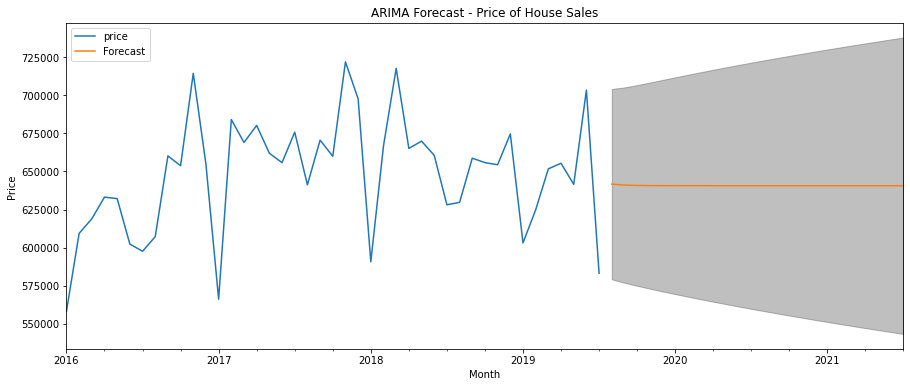

In [84]:
#Plot original data prediction
ax = tp['2016':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Price')
plt.legend(loc = 'upper left')
plt.title("ARIMA Forecast - Price of House Sales")
plt.show()

<AxesSubplot:>

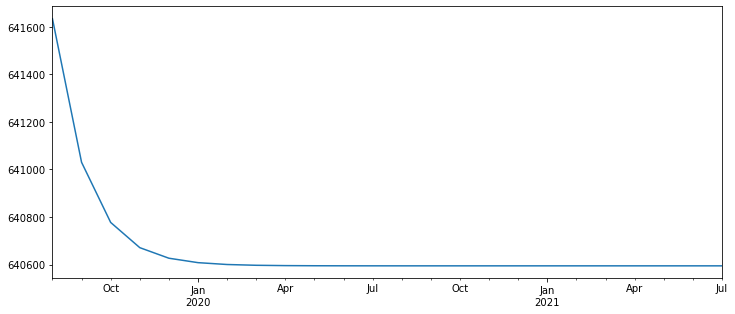

In [69]:
pred_uc.plot(figsize=(12,5))